# Prostate Cancer Analysis and Prediction

<img src="./img/prostate_cancer.jpeg">

# Table of contents
1. [Import packages](#1)
1. [Data Preprocessing](#2)
1. [Exploratory Data Analysis](#3)
1. [Model Selection and Evaluation](#4)
1. [Train and evaluate Ridge Regression](#5)
1. [Conclusion](#6)        

Prostate cancer is a prevalent type of cancer that affects men, and early detection is essential for effective treatment.
One way to predict prostate cancer is through the log of prostate-specific antigen (PSA) levels, as elevated PSA levels can indicate the presence of cancer. 
The dataset used in this project is useful in predicting the prostate specific antigen log values of prostate cancer patients more accurately. The predictor variables may help in understanding the underlying relationship between prostate-specific antigen (PSA) levels and other factors that could affect it, such as prostate volume, age, and tumor size.

| Variable | Description |
| :-- | :-- |
| lcavol | (log) Cancer Volume |
| lweight | (log) Weight |
| age | Patient age |
| lbph | (log) Vening Prostatic Hyperplasia |
| svi | Seminal Vesicle Invasion |
| lcp | Capsular Penetration |
| gleason | Gleason score |
| pgg45 | Percent of Gleason score 4 or 5 |
| lpsa | (log) Prostate Specific Antigen |

<a id="1"></a>
# Import packages

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import train_test_split, GridSearchCV 

In [102]:
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
# Data Preprocessing

In [103]:
df = pd.read_csv('prostate.csv')

In [178]:
# Check for missing values 

print(df.isnull().sum())

Cancer Volume Log                   0
Weight Log                          0
Patient Age                         0
Vening Prostatic Hyperplasia Log    0
Seminal Vesicle Invasion            0
Capsular Penetration Log            0
Gleason score                       0
Percent of Gleason score 4 or 5     0
Prostate Specific Antigen Log       0
dtype: int64


In [104]:
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
 8   lpsa     97 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 6.9 KB


In [106]:
df.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


In [107]:
df.shape

(97, 9)

In [108]:
(df.isnull().sum() / df.shape[0] * 100.00).round(2)

lcavol     0.0
lweight    0.0
age        0.0
lbph       0.0
svi        0.0
lcp        0.0
gleason    0.0
pgg45      0.0
lpsa       0.0
dtype: float64

In [181]:
df.columns = ['Cancer Volume Log', 'Weight Log', 'Patient Age', 'Vening Prostatic Hyperplasia Log', 'Seminal Vesicle Invasion',
              'Capsular Penetration Log', 'Gleason score', 'Percent of Gleason score 4 or 5', 'Prostate Specific Antigen Log']

In [180]:
df.head()

,Cancer Volume Log,Weight Log,Patient Age,Vening Prostatic Hyperplasia Log,Seminal Vesicle Invasion,Capsular Penetration Log,Gleason score,Percent of Gleason score 4 or 5,Prostate Specific Antigen Log
0,-1.645861,-2.125736,-2.028440,-1.030029,-0.525657,-0.867655,-1.131663,-0.868957,-2.528994
1,-1.999313,-0.757063,-0.873583,-1.030029,-0.525657,-0.867655,-1.131663,-0.868957,-2.442006
2,-1.587021,-2.320317,1.436130,-1.030029,-0.525657,-0.867655,0.425377,-0.156155,-2.442006
3,-2.178174,-0.848704,-0.873583,-1.030029,-0.525657,-0.867655,-1.131663,-0.868957,-2.442006
4,-0.510513,-0.476578,-0.296155,-1.030029,-0.525657,-0.867655,-1.131663,-0.868957,-1.941790


<a id="3"></a>
# Exploratory Data Analysis

In [135]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
cat_cols = []
print(num_cols)

['Cancer Volume Log', 'Weight Log', 'Patient Age', 'Vening Prostatic Hyperplasia Log', 'Seminal Vesicle Invasion', 'Capsular Penetration Log', 'Gleason score', 'Percent of Gleason score 4 or 5', 'Prostate Specific Antigen Log']


In [136]:
fig = px.box(df[num_cols], y=num_cols)
fig.show()

In [137]:
corr_matrix = df.corr()
corr_lpsa = corr_matrix['Prostate Specific Antigen Log'].sort_values(ascending=False)

In [138]:
fig = px.imshow(corr_matrix)
fig.show()

In [139]:
fig = px.bar(corr_lpsa, x=corr_lpsa.index, y=corr_lpsa.values)
fig.show()

In [140]:
# Check for outliers using IQR method
def IQR_outliers(col):

    Q1 = np.percentile(df[col], 25,
                       interpolation = 'midpoint')

    Q3 = np.percentile(df[col], 75,
                       interpolation = 'midpoint')
    
    per_95 = np.percentile(df[col], 95,
                       interpolation = 'midpoint')
    
    IQR = Q3 - Q1
    
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    
    df[col] = np.where(df[col] > upper, per_95, df[col])
    df[col] = np.where(df[col] < lower, lower, df[col])

    return df



for col in num_cols:
    df = IQR_outliers(col)

In [141]:
fig = px.box(df[num_cols], y=num_cols)
fig.show()

In [142]:
# Check for skewness in numerical columns
skew_vals = df[num_cols].skew()
print(skew_vals)

Cancer Volume Log                  -0.250304
Weight Log                         -0.048387
Patient Age                        -0.511306
Vening Prostatic Hyperplasia Log    0.133813
Seminal Vesicle Invasion            1.398441
Capsular Penetration Log            0.728634
Gleason score                       0.697498
Percent of Gleason score 4 or 5     0.968105
Prostate Specific Antigen Log      -0.375662
dtype: float64


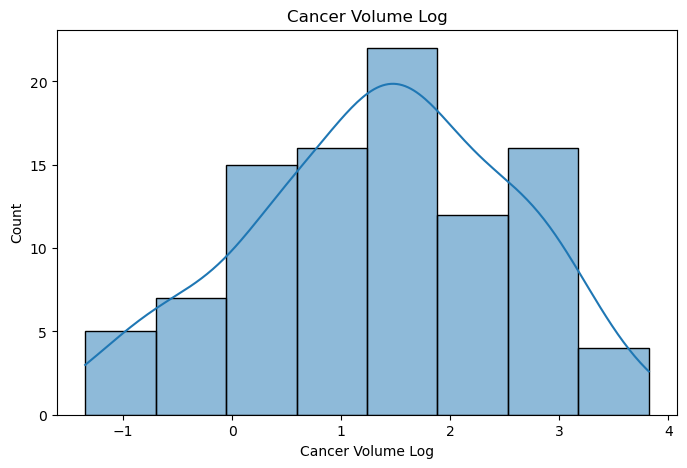

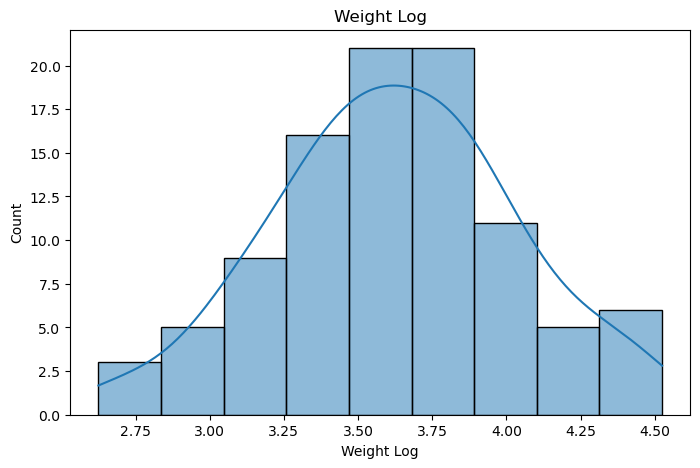

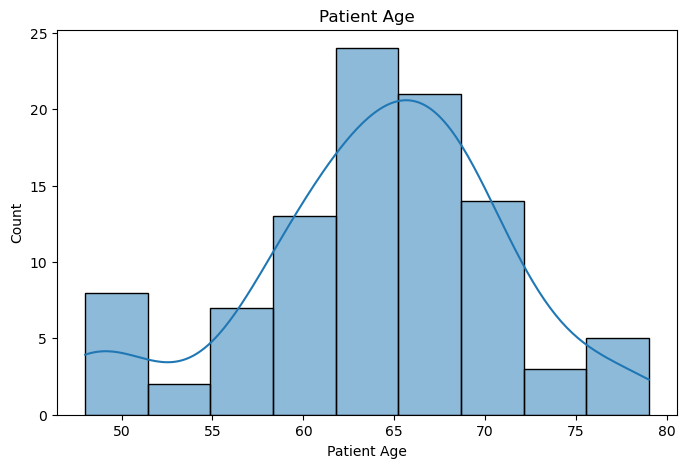

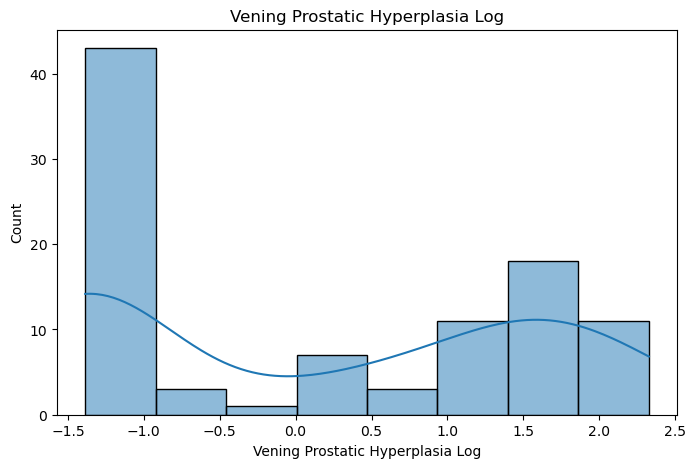

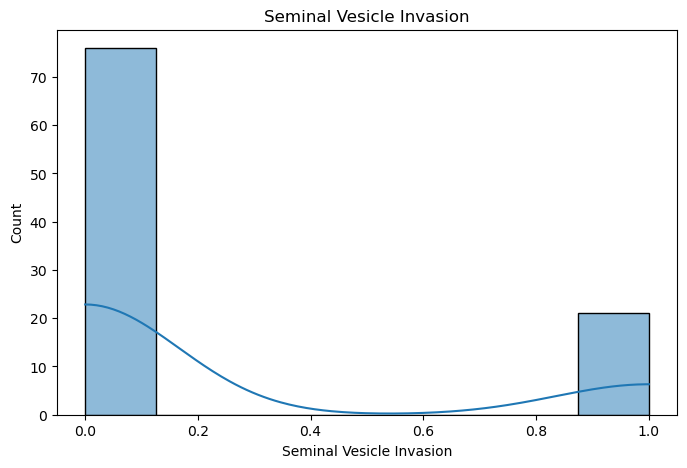

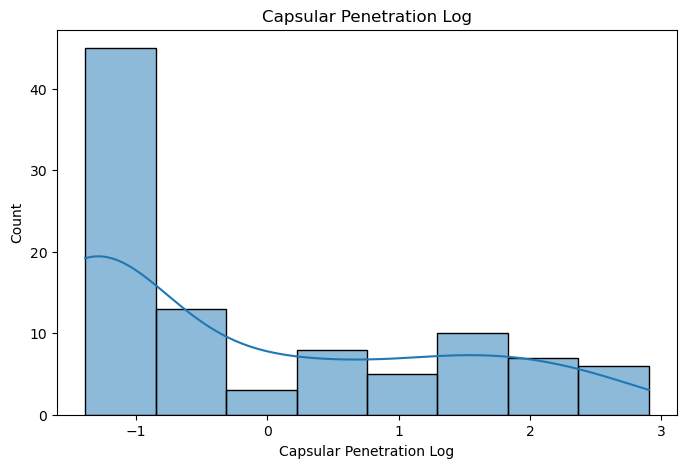

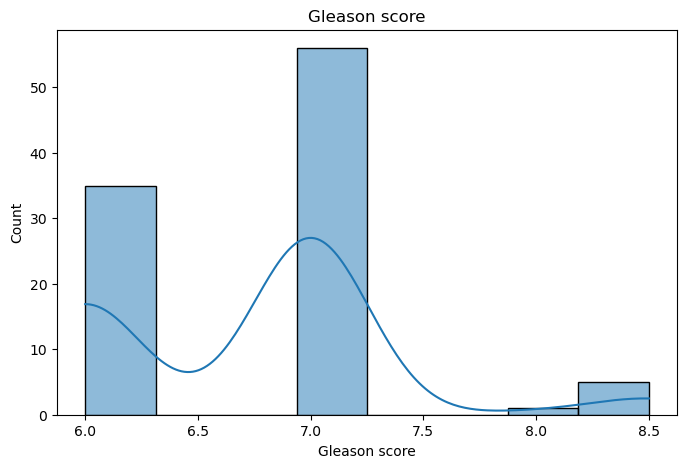

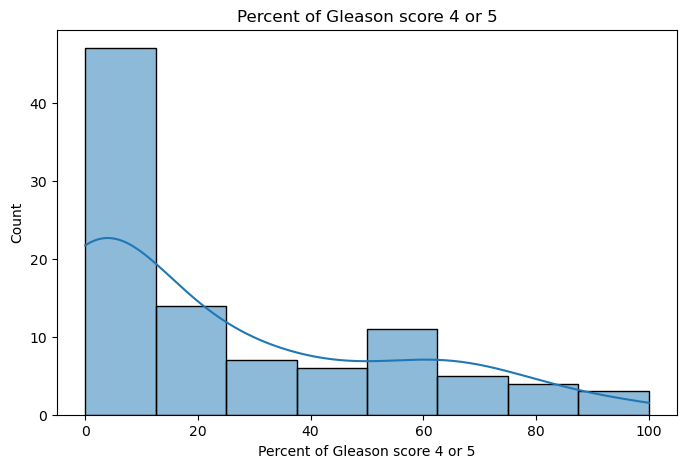

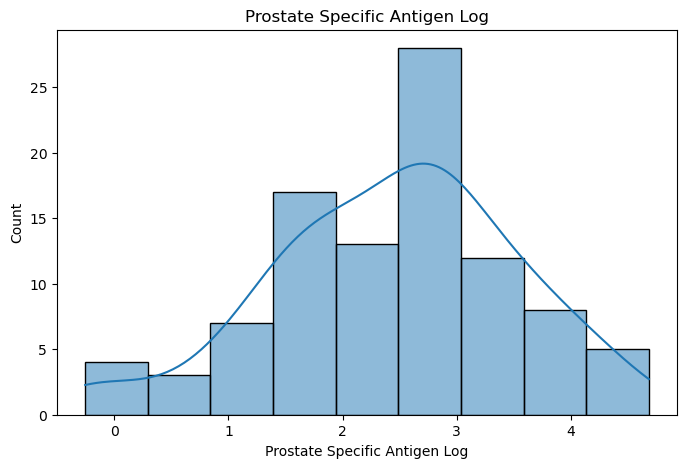

In [143]:
# Visualize distributions of numerical columns
for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

In [144]:
# Apply log transformation to highly skewed numerical columns
skew_thresh = 1.5
for col in num_cols:
    if skew_vals[col] > skew_thresh:
        df[col] = np.log1p(df[col])

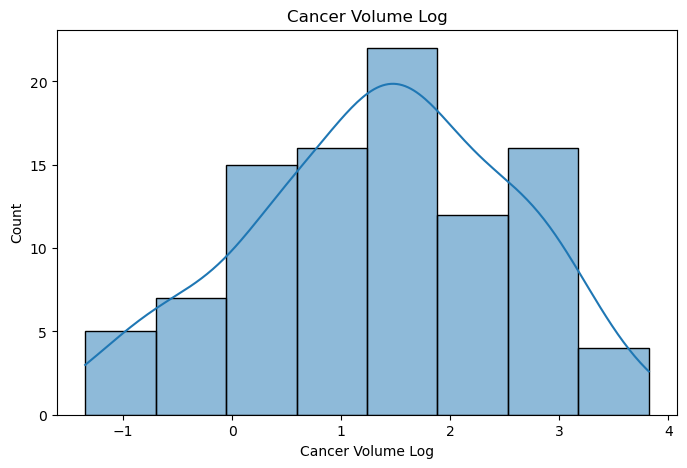

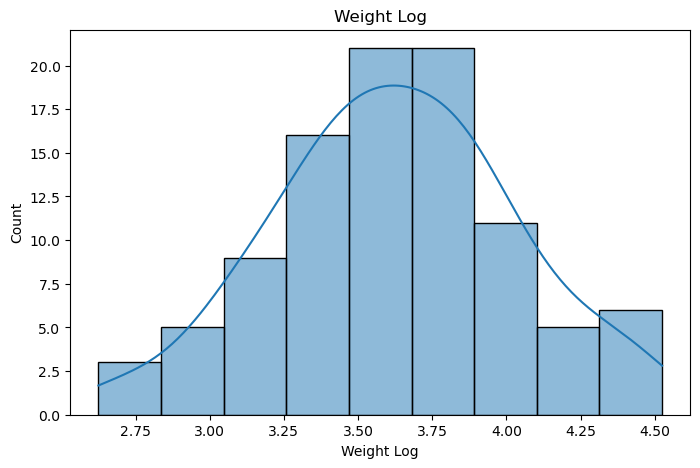

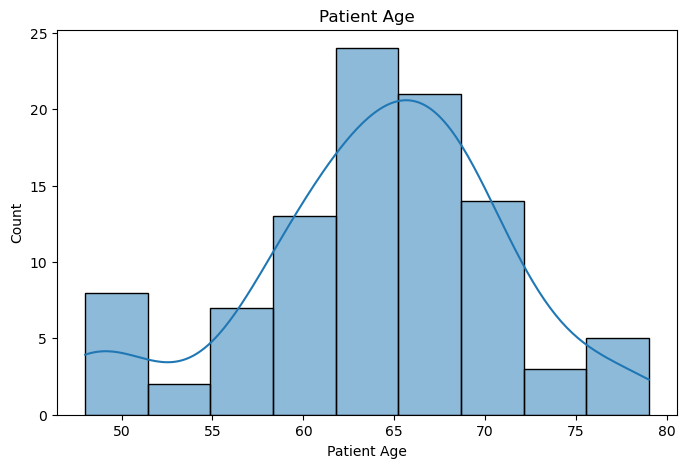

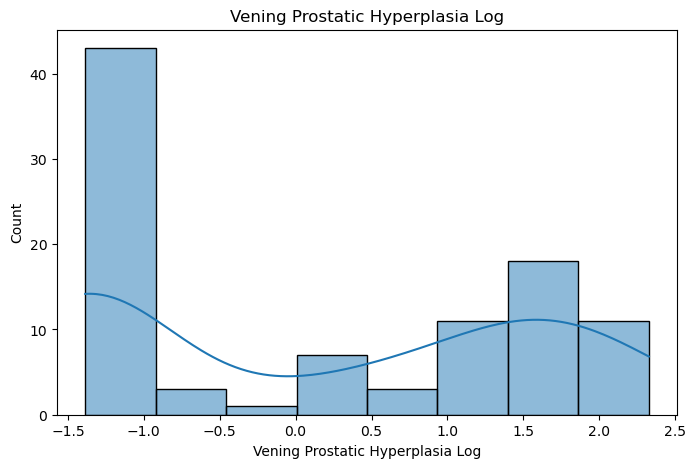

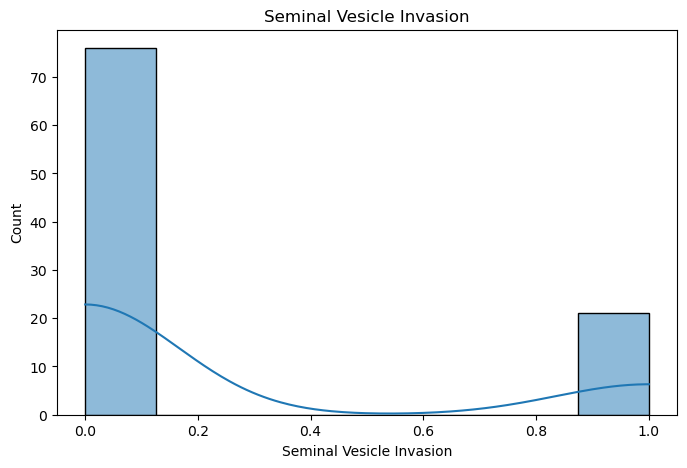

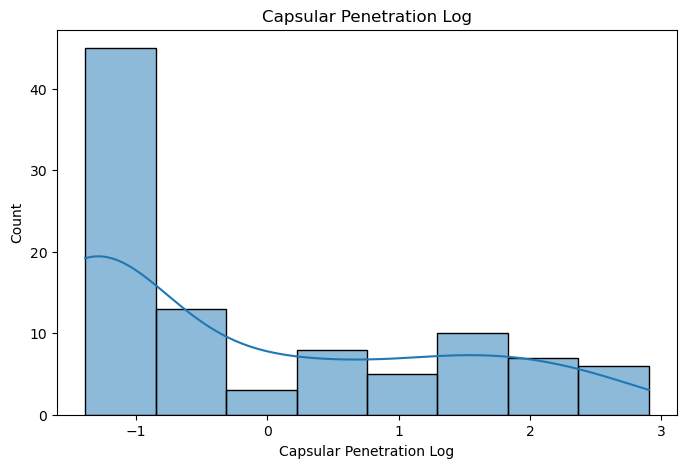

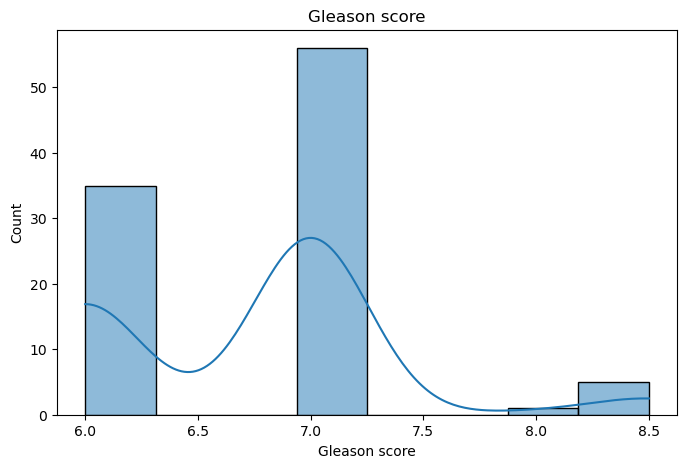

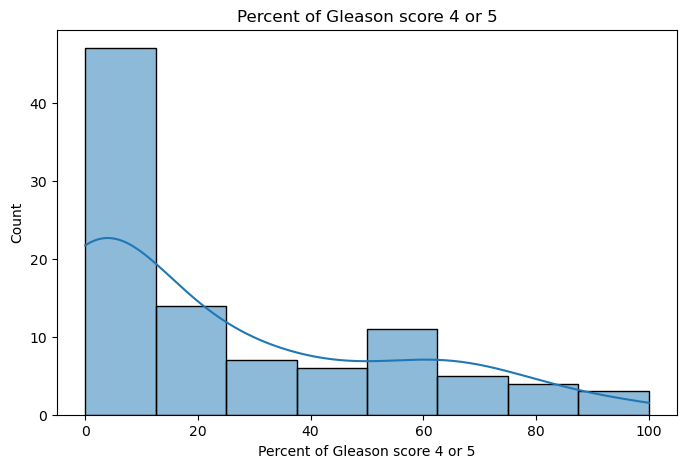

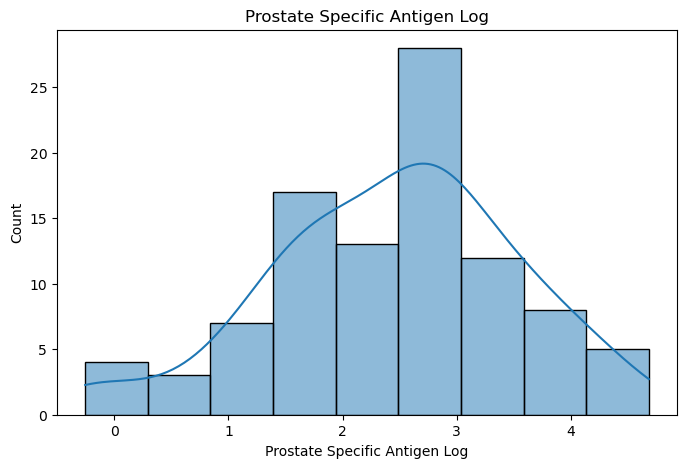

In [145]:
# Visualize distributions of transformed numerical columns
for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

In [146]:
# Scale numerical variables
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)
df = pd.concat([scaled_df, df[cat_cols]], axis=1)

In [148]:
# Split data into training and testing sets
X = df.drop('Prostate Specific Antigen Log', axis=1)
y = df['Prostate Specific Antigen Log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id="4"></a>
# Model Selection and Evaluation

## Linear Regression Model

In [155]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_reg_pred = lin_reg.predict(X_test)
lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)
lin_reg_r2 = r2_score(y_test, lin_reg_pred)

print("Linear Regression")
print("Mean squared error: {:.2f}".format(lin_reg_mse))
print("R2 score: {:.2f}".format(lin_reg_r2))

Linear Regression
Mean squared error: 0.31
R2 score: 0.75


## Lasso Regression

In [156]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("\nLasso Regression")
print("Mean squared error: {:.2f}".format(lasso_mse))
print("R2 score: {:.2f}".format(lasso_r2))


Lasso Regression
Mean squared error: 0.40
R2 score: 0.67


## Ridge Regression

In [157]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("\nRidge Regression")
print("Mean squared error: {:.2f}".format(ridge_mse))
print("R2 score: {:.2f}".format(ridge_r2))


Ridge Regression
Mean squared error: 0.31
R2 score: 0.75


## Decision Tree Regression

In [160]:
dt_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Regression")
print("Mean squared error: {:.2f}".format(ridge_mse))
print("R2 score: {:.2f}".format(r2_dt))


Decision Tree Regression
Mean squared error: 0.31
R2 score: 0.35


## Random Forest Regression

In [161]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression")
print("Mean squared error: {:.2f}".format(ridge_mse))
print("R2 score: {:.2f}".format(r2_rf))


Random Forest Regression
Mean squared error: 0.31
R2 score: 0.67


# Evaluate the performance of the models

In [165]:
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Decision Tree Regression', 'Random Forest Regression']
mse_scores = [lin_reg_mse, lasso_mse, ridge_mse, mse_dt, mse_rf]
r2_scores = [lin_reg_r2, lasso_r2, ridge_r2, r2_dt, r2_rf]

print('\nMean Squared Error Scores:')
for i in range(len(models)):
    print(models[i] + ':', mse_scores[i])

print('\nR-squared Scores:')
for i in range(len(models)):
    print(models[i] + ':', r2_scores[i])


Mean Squared Error Scores:
Linear Regression: 0.30914674505991174
Lasso Regression: 0.4036705774511802
Ridge Regression: 0.30897994034746673
Decision Tree Regression: 0.7854068352746727
Random Forest Regression: 0.3996981822859925

R-squared Scores:
Linear Regression: 0.7452716786034423
Lasso Regression: 0.6673866691645393
Ridge Regression: 0.7454091210481102
Decision Tree Regression: 0.35284660776833354
Random Forest Regression: 0.6706598123191145


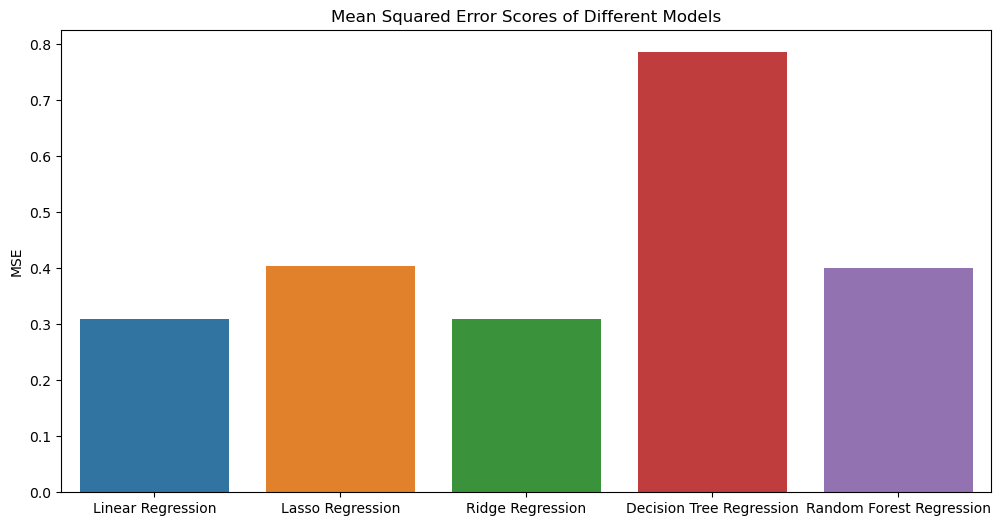

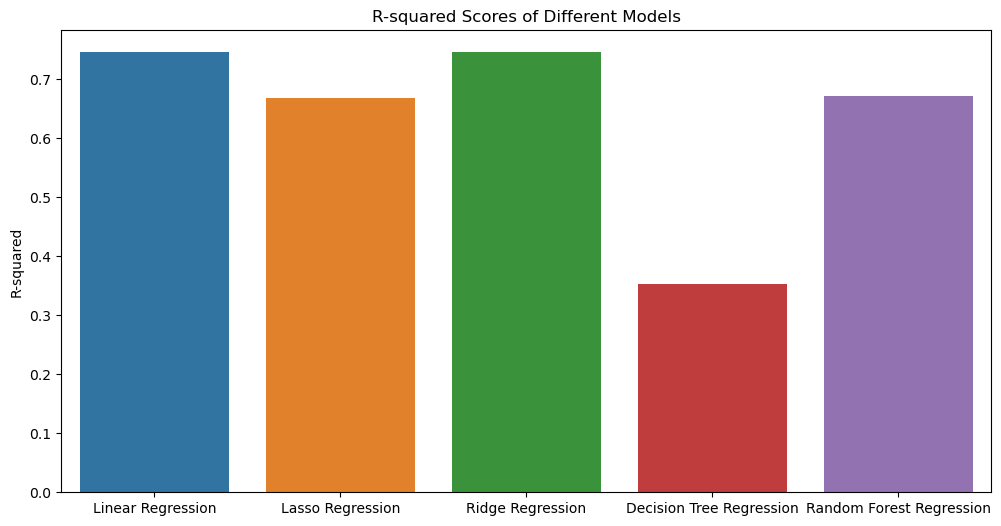

In [166]:
plt.figure(figsize=(12,6))
sns.barplot(x=models, y=mse_scores)
plt.title('Mean Squared Error Scores of Different Models')
plt.ylabel('MSE')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=models, y=r2_scores)
plt.title('R-squared Scores of Different Models')
plt.ylabel('R-squared')
plt.show()

In [167]:
best_model_idx = r2_scores.index(max(r2_scores))
best_model = models[best_model_idx]
print('\nBest Model:', best_model)


Best Model: Ridge Regression


<a id="5"></a>
# Train and evaluate Ridge Regression

## Hyperparameter tuning using GridSearchCV

In [170]:
params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
ridge_reg = Ridge()
grid_search = GridSearchCV(ridge_reg, params, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

## Best hyperparameters and model

In [171]:
best_params = grid_search.best_params_
best_ridge_reg = grid_search.best_estimator_

print('Best hyperparameters:', best_params)

Best hyperparameters: {'alpha': 1.0}


## Evaluate on the testing set

In [173]:
y_pred = best_ridge_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('RMSE:', rmse)
print('R^2:', r2)

RMSE: 0.5547836725838953
R^2: 0.7463937818109245


## Visualize actual vs predicted values

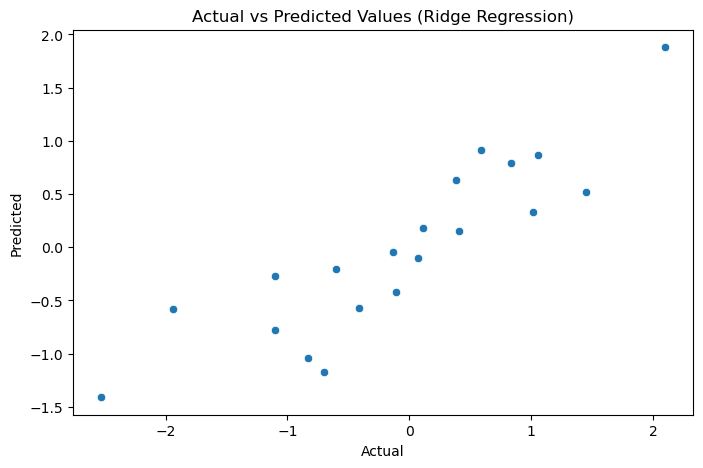

In [174]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Ridge Regression)')
plt.show()

## Visualize residuals

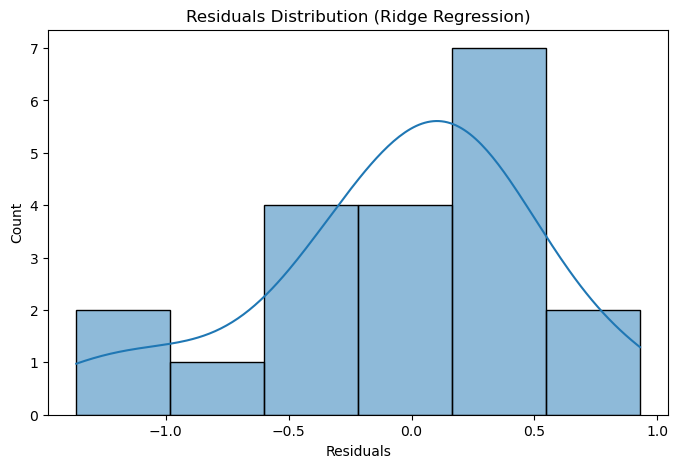

In [175]:
plt.figure(figsize=(8,5))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution (Ridge Regression)')
plt.show()

## Feature importance

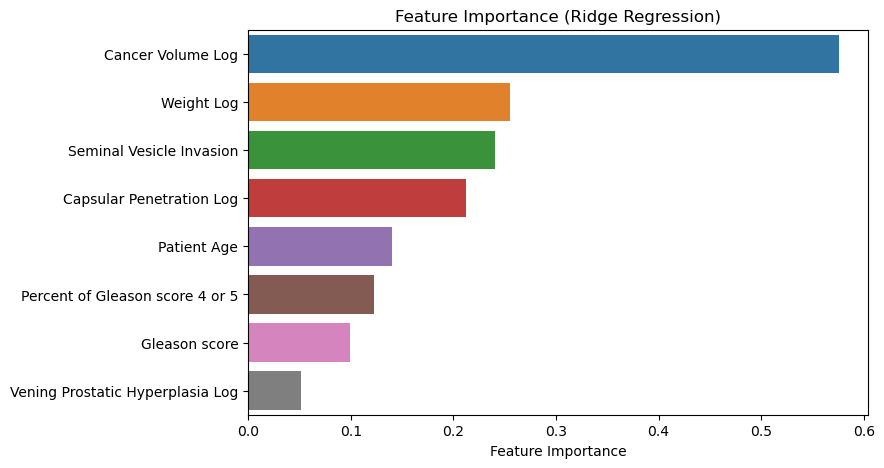

In [176]:
coef = pd.Series(best_ridge_reg.coef_, index=X.columns)
importance = coef.abs().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importance, y=importance.index)
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Ridge Regression)')
plt.show()

<a id="6"></a>
# Conclusion

In [177]:
print('Ridge Regression is the best model with a RMSE of', rmse, 'and R^2 of', r2, '.')
print('The most important features in predicting lpsa are:', importance[:5].index.tolist(), '.')

Ridge Regression is the best model with a RMSE of 0.5547836725838953 and R^2 of 0.7463937818109245 .
The most important features in predicting lpsa are: ['Cancer Volume Log', 'Weight Log', 'Seminal Vesicle Invasion', 'Capsular Penetration Log', 'Patient Age'] .
